In [3]:
import requests

url = "https://images.aqr.com/-/media/AQR/Documents/Insights/Data-Sets/Quality-Minus-Junk-Factors-Monthly.xlsx"
resp = requests.get(url)

output = open('data/QMJ.xlsx', 'wb')
output.write(resp.content)
output.close()

In [5]:
import pandas as pd

xls_QMJ = pd.ExcelFile('data/QMJ.xlsx')

In [6]:
xls_QMJ.sheet_names

['QMJ Factors',
 'Definition',
 'Data Sources',
 '--> Additional Global Factors',
 'MKT',
 'SMB',
 'HML FF',
 'HML Devil',
 'UMD',
 'ME(t-1)',
 'RF',
 'Sources and Definitions',
 'Disclosures']

In [16]:
df_QMJ = xls_QMJ.parse(sheet_name = 'QMJ Factors', skiprows = 18)
df_QMJ = df_QMJ.loc[df_QMJ['DATE'].notnull().values, ['DATE', 'Global']]

df_MKT = xls_QMJ.parse(sheet_name = 'MKT', skiprows = 18)
df_MKT = df_MKT.loc[df_MKT['DATE'].notnull().values, ['DATE', 'Global']]


df_SMB = xls_QMJ.parse(sheet_name = 'SMB', skiprows = 18)
df_SMB = df_SMB.loc[df_SMB['DATE'].notnull().values, ['DATE', 'Global']]

df_HML = xls_QMJ.parse(sheet_name = 'HML Devil', skiprows = 18)
df_HML = df_HML.loc[df_HML['DATE'].notnull().values, ['DATE', 'Global']]

df_UMD = xls_QMJ.parse(sheet_name = 'UMD', skiprows = 18)
df_UMD = df_UMD.loc[df_UMD['DATE'].notnull().values, ['DATE', 'Global']]

df_RF = xls_QMJ.parse(sheet_name = 'RF', skiprows = 18)

In [26]:
from functools import reduce

df_list = [df_QMJ, df_MKT, df_SMB, df_HML, df_UMD, df_RF]

df = reduce(lambda  left, right: pd.merge(left,right,on=['DATE'],
                                          how='inner'), df_list).dropna()

df.columns = ['DATE', 'QMJ', 'MKT', 'SMB', 'HML', 'UMD', 'RF']

In [27]:
df

,DATE,QMJ,MKT,SMB,HML,UMD,RF
384,07/31/1989,0.012371,0.100141,-0.019710,-0.020359,0.022080,0.006658
385,08/31/1989,0.001429,-0.025248,0.020299,0.029662,-0.019099,0.006500
386,09/30/1989,0.003403,0.028691,0.024144,-0.013927,0.012080,0.006575
387,10/31/1989,0.031087,-0.040855,-0.011150,-0.011693,0.000345,0.006592
388,11/30/1989,0.007741,0.031000,-0.004366,-0.027178,0.008297,0.006475
...,...,...,...,...,...,...,...
757,08/31/2020,0.000284,0.063865,0.004438,0.000182,-0.010860,0.000075
758,09/30/2020,0.013606,-0.030732,0.012151,-0.031402,0.035866,0.000092
759,10/31/2020,0.009341,-0.022333,0.017241,0.013816,-0.007249,0.000083
760,11/30/2020,-0.081916,0.128086,0.027514,0.113377,-0.146656,0.000075


In [43]:
df_select = df.loc[:, ['DATE', 'QMJ']].set_index('DATE')

cum_ret  = (df_select + 1).cumprod()-1

<AxesSubplot:xlabel='DATE'>

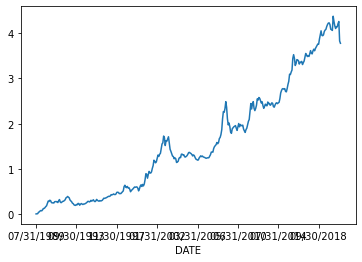

In [51]:
import matplotlib.pyplot as plt

cum_ret.plot(legend = None)